In [2]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Importing the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Load the dataset
data  = pd.read_csv('BankChurners.csv')


# Display the first few rows of the dataframe
print(data .head())
print(data.shape)

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [4]:
print(data.columns)
print(data.dtypes)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')
CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                             

In [5]:
# drop columns
data = data.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [6]:
print(data.shape)
# Dataframe information
data.info()

(10127, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64

In [7]:
# Assuming df is your DataFrame
# Convert categorical columns using one-hot encoding
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
##from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X = data.drop('Attrition_Flag', axis=1)  # Features
y = data['Attrition_Flag']  # Target variable, assuming 'Attrition_Flag' indicates churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Assuming 'Attrited Customer' means the customer has churned
y_train = (y_train == 'Attrited Customer').astype(int)
y_test = (y_test == 'Attrited Customer').astype(int)

# Now y_train and y_test contain 0s and 1s instead of string labels

In [9]:
dc= DecisionTreeClassifier(random_state=42)
dc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dc.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for the test set
y_probs = dc.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, roc_auc_score
# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
# Calculate FPR, TPR, and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2543
           1       0.79      0.78      0.79       496

    accuracy                           0.93      3039
   macro avg       0.88      0.87      0.87      3039
weighted avg       0.93      0.93      0.93      3039

ROC AUC: 0.872278661854807


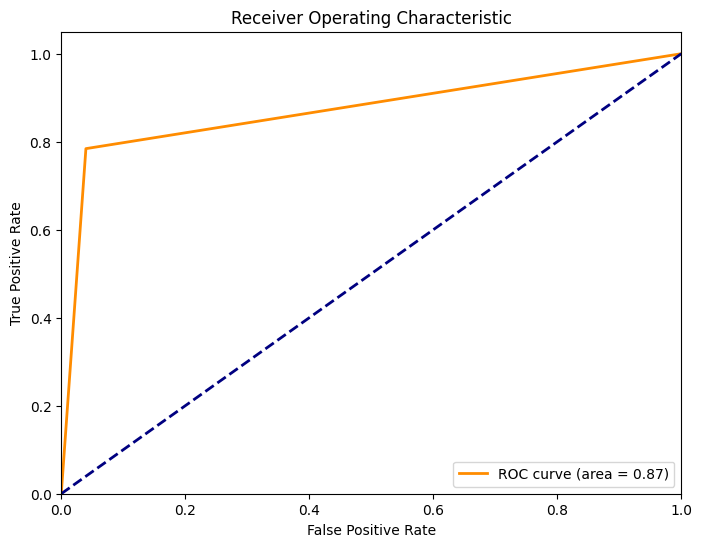

In [11]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

                           Feature  Importance
12                  Total_Trans_Ct    0.295589
8              Total_Revolving_Bal    0.193490
11                 Total_Trans_Amt    0.154839
4         Total_Relationship_Count    0.083480
13             Total_Ct_Chng_Q4_Q1    0.067103
10            Total_Amt_Chng_Q4_Q1    0.049451
1                     Customer_Age    0.043953
9                  Avg_Open_To_Buy    0.021844
3                   Months_on_book    0.019071
6            Contacts_Count_12_mon    0.015666
7                     Credit_Limit    0.011734
22          Marital_Status_Married    0.006218
0                        CLIENTNUM    0.006179
14           Avg_Utilization_Ratio    0.004349
2                  Dependent_count    0.004015
18     Education_Level_High School    0.003236
16       Education_Level_Doctorate    0.002859
32            Card_Category_Silver    0.002488
17        Education_Level_Graduate    0.002487
5           Months_Inactive_12_mon    0.002373
26     Income

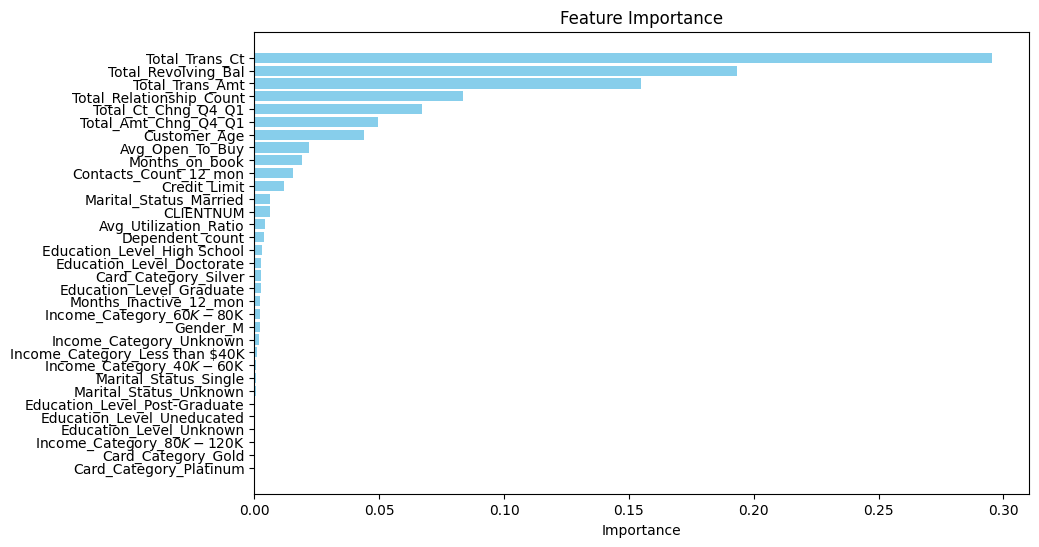

In [25]:
import matplotlib.pyplot as plt

# Assuming 'dc' is your trained Decision Tree model
feature_importances = dc.feature_importances_
features = X_train.columns

# Create a DataFrame to view features and their importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [13]:
# Assuming 'y_probs' contains the probabilities of churning
X_test['Churn_Probability'] = y_probs
X_test['Risk_Segment'] = pd.cut(X_test['Churn_Probability'], bins=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])

# Analyzing different segments
segment_analysis = X_test.groupby('Risk_Segment').mean()
print(segment_analysis)


C:\Users\afshi\AppData\Local\Temp\ipykernel_16372\4129771020.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = X_test.groupby('Risk_Segment').mean()


                 CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
Risk_Segment                                                                
Low                    NaN           NaN              NaN             NaN   
Medium                 NaN           NaN              NaN             NaN   
High          7.362854e+08     46.414286         2.436735       36.255102   

              Total_Relationship_Count  Months_Inactive_12_mon  \
Risk_Segment                                                     
Low                                NaN                     NaN   
Medium                             NaN                     NaN   
High                          3.414286                2.636735   

              Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Risk_Segment                                                             
Low                             NaN           NaN                  NaN   
Medium                          NaN           NaN            

In [14]:
# Identify high-risk customers
high_risk_customers = X_test[X_test['Risk_Segment'] == 'High']

# Sample action: Send a promotional email
high_risk_customers['Action'] = 'Send 10% discount offer on next bill'

print(high_risk_customers[['Churn_Probability', 'Action']])


      Churn_Probability                                Action
3994                1.0  Send 10% discount offer on next bill
5137                1.0  Send 10% discount offer on next bill
4768                1.0  Send 10% discount offer on next bill
303                 1.0  Send 10% discount offer on next bill
4540                1.0  Send 10% discount offer on next bill
...                 ...                                   ...
8857                1.0  Send 10% discount offer on next bill
8769                1.0  Send 10% discount offer on next bill
7413                1.0  Send 10% discount offer on next bill
4747                1.0  Send 10% discount offer on next bill
420                 1.0  Send 10% discount offer on next bill

[490 rows x 2 columns]


C:\Users\afshi\AppData\Local\Temp\ipykernel_16372\2632970356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_risk_customers['Action'] = 'Send 10% discount offer on next bill'


In [15]:
# Assuming you have probabilities of churn in y_probs
X_test['Churn_Probability'] = y_probs
X_test['Risk_Segment'] = pd.cut(X_test['Churn_Probability'], bins=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])

# Example action plan based on risk segments
def assign_actions(row):
    if row['Risk_Segment'] == 'High':
        return 'Offer loyalty discount and schedule service call'
    elif row['Risk_Segment'] == 'Medium':
        return 'Send personalized retention offers'
    else:
        return 'Maintain regular engagement'

X_test['Action'] = X_test.apply(assign_actions, axis=1)
print(X_test[['Risk_Segment', 'Action']])



     Risk_Segment                       Action
3781          NaN  Maintain regular engagement
2922          NaN  Maintain regular engagement
5070          NaN  Maintain regular engagement
7246          NaN  Maintain regular engagement
623           NaN  Maintain regular engagement
...           ...                          ...
6621          NaN  Maintain regular engagement
9535          NaN  Maintain regular engagement
4638          NaN  Maintain regular engagement
1166          NaN  Maintain regular engagement
254           NaN  Maintain regular engagement

[3039 rows x 2 columns]


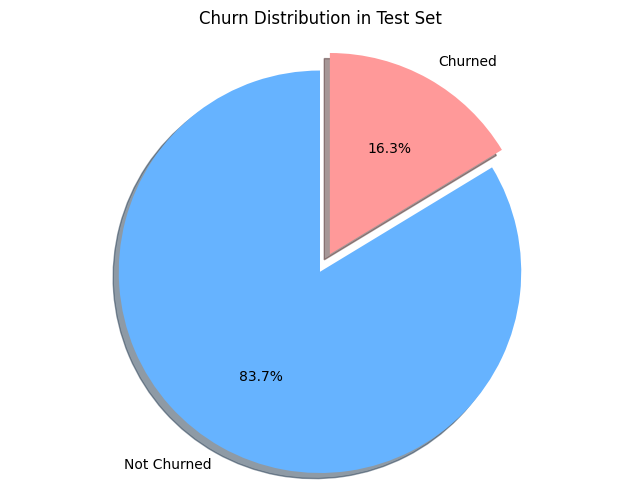

In [18]:
# Counting the number of churned vs not churned in y_test
churn_distribution = y_test.value_counts()

# Labels for the pie chart
labels = 'Not Churned', 'Churned'
sizes = [churn_distribution[0], churn_distribution[1]]
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.1)  # only explode the 2nd slice (i.e., Churned)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Churn Distribution in Test Set')
plt.show()


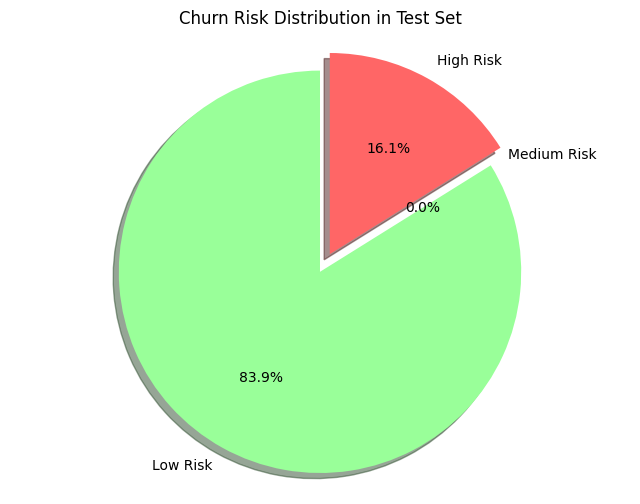

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'y_probs' contains the probabilities of churning for the test set
# Let's create a DataFrame for easy manipulation
test_results = pd.DataFrame({
    'Churn_Probability': y_probs,
    'Actual': y_test
})

# Define risk categories based on churn probability
def risk_category(prob):
    if prob > 0.66:
        return 'High Risk'
    elif prob > 0.33:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Apply function to categorize risks
test_results['Risk_Category'] = test_results['Churn_Probability'].apply(risk_category)

# Save this data to a CSV file
high_risk_customers.to_csv('high_risk_customers.csv', index=False)

print("High risk customers saved to 'high_risk_customers.csv'.")
# Count the number of customers in each category, ensuring all categories are represented
risk_counts = test_results['Risk_Category'].value_counts().reindex(['Low Risk', 'Medium Risk', 'High Risk'], fill_value=0)

# Labels, sizes, colors, and explosion settings
labels = risk_counts.index
sizes = risk_counts.values
colors = ['#99ff99', '#ffcc99', '#ff6666']  # Green for low, orange for medium, red for high
explode = (0, 0, 0.1)  # only explode the slice for 'High Risk'

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Churn Risk Distribution in Test Set')
plt.show()



In [21]:
import pandas as pd

# Assuming you have a DataFrame 'test_results' from previous steps which includes 'Churn_Probability'
# Recreate the 'Risk_Category' in case it's not already there
def risk_category(prob):
    if prob > 0.66:
        return 'High Risk'
    elif prob > 0.33:
        return 'Medium Risk'
    else:
        return 'Low Risk'

test_results['Risk_Category'] = test_results['Churn_Probability'].apply(risk_category)

# Filter to get only High Risk customers
high_risk_customers = test_results[test_results['Risk_Category'] == 'High Risk']

# Optional: if you need specific customer details, make sure those columns are included in 'test_results'
# For example, if you have customer IDs or other identifying information, ensure those are part of your DataFrame

# Save this data to a CSV file
high_risk_customers.to_csv('high_risk_customers.csv', index=False)

print("High risk customers saved to 'high_risk_customers.csv'.")


High risk customers saved to 'high_risk_customers.csv'.


In [24]:
import pandas as pd

# Assuming you have a DataFrame 'test_results' from previous steps which includes 'Churn_Probability'
# Recreate the 'Risk_Category' in case it's not already there
def risk_category(prob):
    if prob > 0.66:
        return 'High Risk'
    elif prob > 0.33:
        return 'Medium Risk'
    else:
         return 'Low Risk'
test_results = X_test.copy()
test_results['Churn_Probability'] = y_probs
test_results['Risk_Category'] = test_results['Churn_Probability'].apply(risk_category)

# Filter to get only High Risk customers
high_risk_customers = test_results[test_results['Risk_Category'] == 'High Risk']

# Save this data to a CSV file, ensuring to include 'CLIENTNUM'
high_risk_customers.to_csv('ID_high_risk_customers.csv', index=False)

print("ID High risk customers saved to 'ID _ high_risk_customers.csv'.")

ID High risk customers saved to 'ID _ high_risk_customers.csv'.


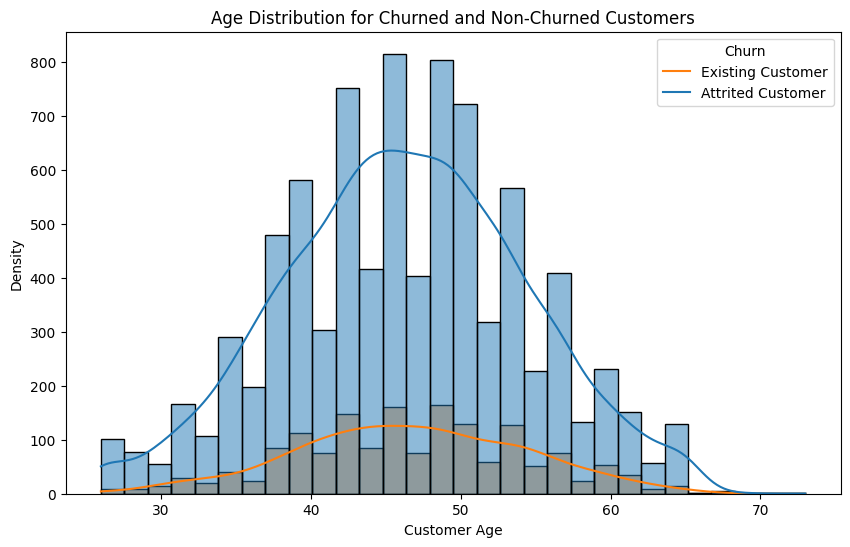

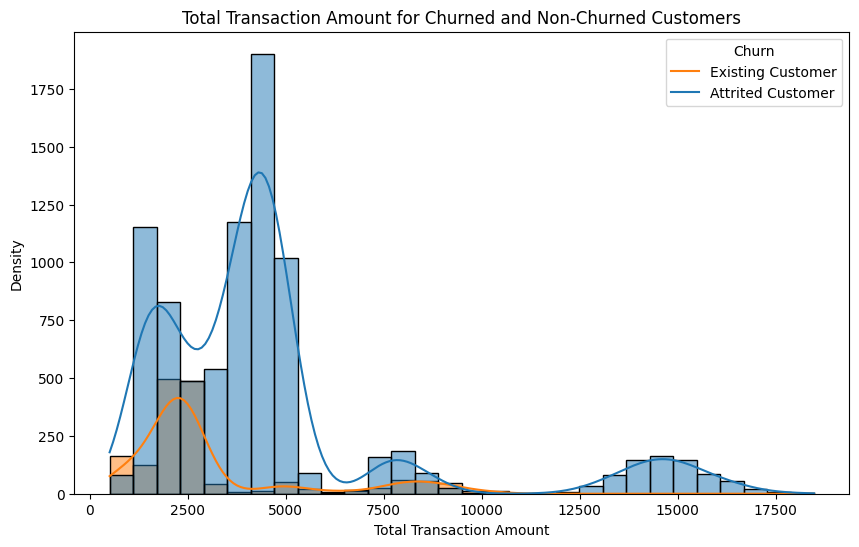

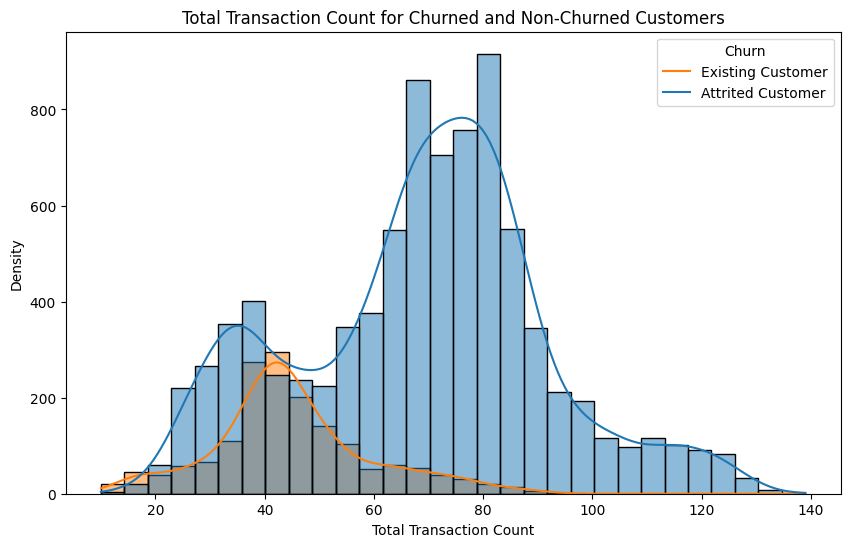

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Customer_Age', hue='Attrition_Flag', kde=True, bins=30)
plt.title('Age Distribution for Churned and Non-Churned Customers')
plt.xlabel('Customer Age')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Existing Customer', 'Attrited Customer'])
plt.show()

# Total Transaction Amount vs. Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Total_Trans_Amt', hue='Attrition_Flag', kde=True, bins=30)
plt.title('Total Transaction Amount for Churned and Non-Churned Customers')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Existing Customer', 'Attrited Customer'])
plt.show()

# Total Transaction Count vs. Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Total_Trans_Ct', hue='Attrition_Flag', kde=True, bins=30)
plt.title('Total Transaction Count for Churned and Non-Churned Customers')
plt.xlabel('Total Transaction Count')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Existing Customer', 'Attrited Customer'])
plt.show()

# Repeat the process for other important features...


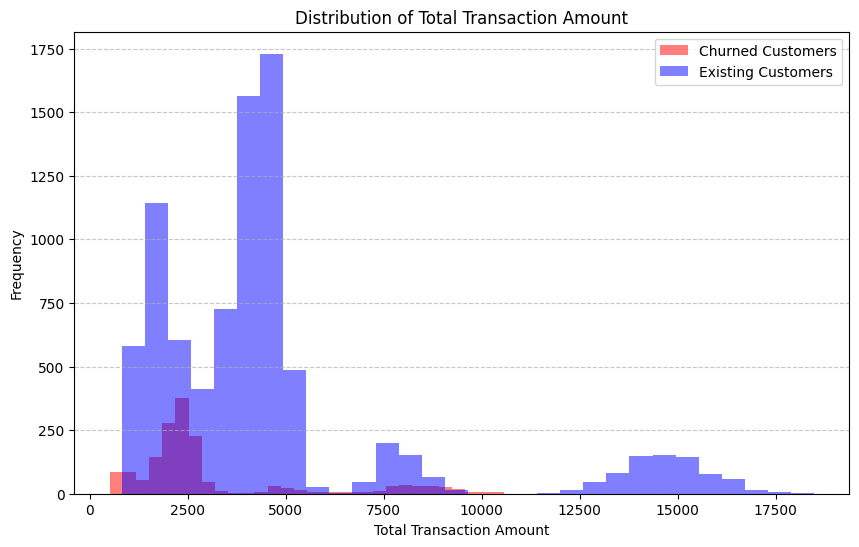

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the customer data

# Step 1: Split the dataset into churned and non-churned customers
churned_customers = data[data['Attrition_Flag'] == 'Attrited Customer']
existing_customers = data[data['Attrition_Flag'] == 'Existing Customer']

# Step 2: Plot the distribution of Total_Trans_Amt for both groups
plt.figure(figsize=(10, 6))
plt.hist(churned_customers['Total_Trans_Amt'], bins=30, alpha=0.5, color='red', label='Churned Customers')
plt.hist(existing_customers['Total_Trans_Amt'], bins=30, alpha=0.5, color='blue', label='Existing Customers')
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



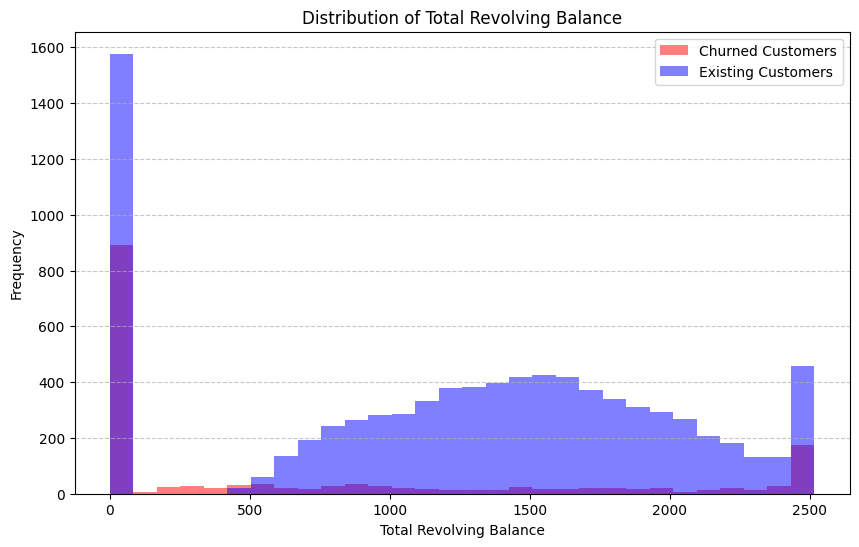

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the customer data

# Step 1: Split the dataset into churned and non-churned customers
churned_customers = data[data['Attrition_Flag'] == 'Attrited Customer']
existing_customers = data[data['Attrition_Flag'] == 'Existing Customer']

# Step 2: Plot the distribution of Total_Revolving_Bal for both groups
plt.figure(figsize=(10, 6))
plt.hist(churned_customers['Total_Revolving_Bal'], bins=30, alpha=0.5, color='red', label='Churned Customers')
plt.hist(existing_customers['Total_Revolving_Bal'], bins=30, alpha=0.5, color='blue', label='Existing Customers')
plt.title('Distribution of Total Revolving Balance')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\afshi\AppData\Local\Temp\ipykernel_16372\2262467705.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_age = data.groupby('Age_Group')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())


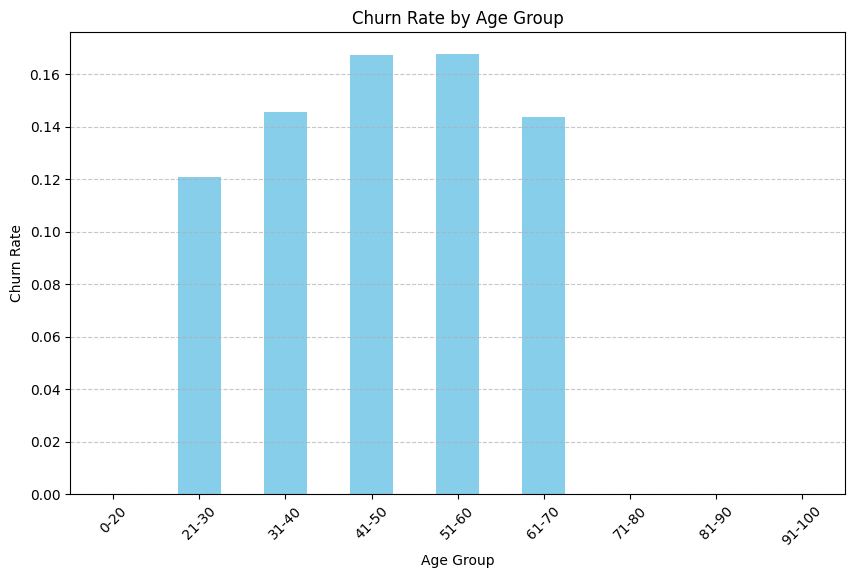

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the customer data
# Group customers by age group
data['Age_Group'] = pd.cut(data['Customer_Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Calculate churn rate by age group
churn_rate_by_age = data.groupby('Age_Group')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())

# Plot churn rate by age group
plt.figure(figsize=(10, 6))
churn_rate_by_age.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


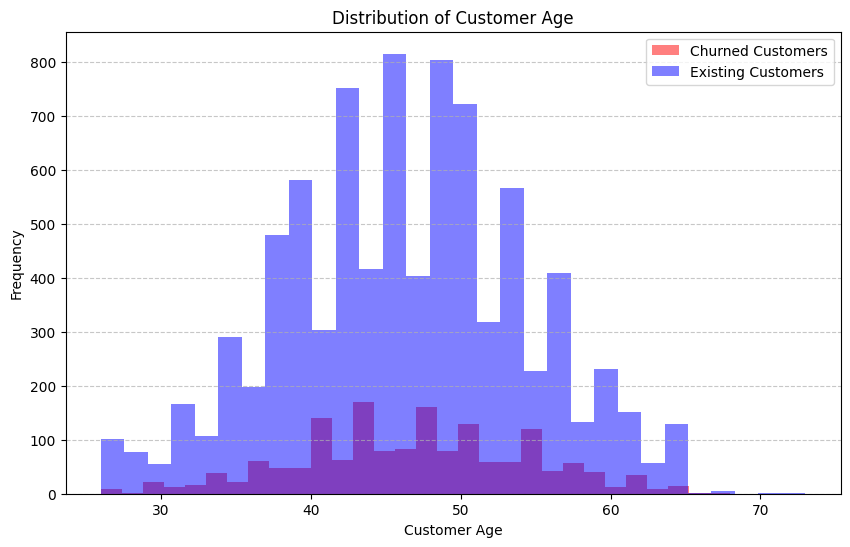

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the customer data

# Step 1: Split the dataset into churned and non-churned customers
churned_customers = data[data['Attrition_Flag'] == 'Attrited Customer']
existing_customers = data[data['Attrition_Flag'] == 'Existing Customer']

# Step 2: Plot the distribution of Age for both groups
plt.figure(figsize=(10, 6))
plt.hist(churned_customers['Customer_Age'], bins=30, alpha=0.5, color='red', label='Churned Customers')
plt.hist(existing_customers['Customer_Age'], bins=30, alpha=0.5, color='blue', label='Existing Customers')
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


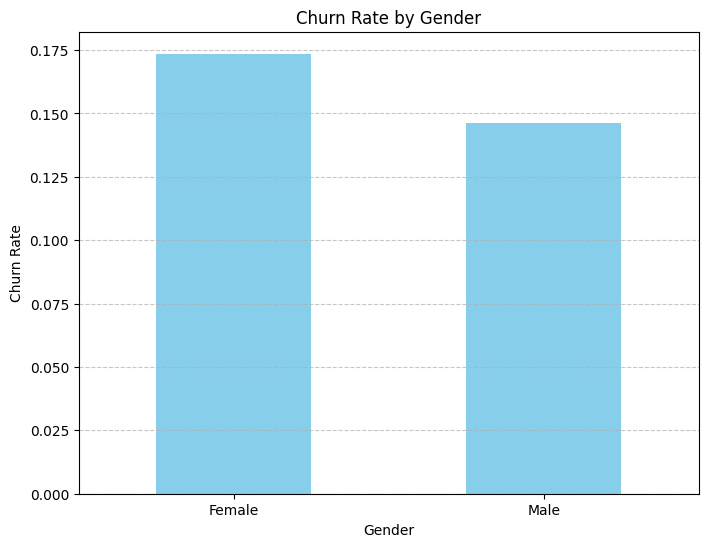

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the customer data
# Calculate churn rate by gender
# Map boolean values to categorical values
data['Gender_M'] = data['Gender_M'].map({True: 'Male', False: 'Female'})
churn_rate_by_gender = data.groupby('Gender_M')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())

# Plot churn rate by gender
plt.figure(figsize=(8, 6))
churn_rate_by_gender.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


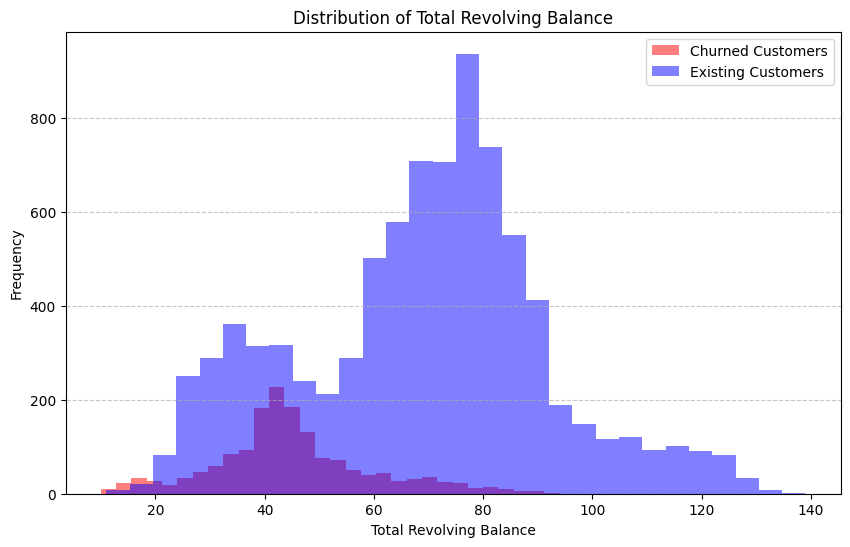

In [44]:



import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the customer data

# Step 1: Split the dataset into churned and non-churned customers
churned_customers = data[data['Attrition_Flag'] == 'Attrited Customer']
existing_customers = data[data['Attrition_Flag'] == 'Existing Customer']

# Step 2: Plot the distribution of Total_Revolving_Bal for both groups
plt.figure(figsize=(10, 6))
plt.hist(churned_customers['Total_Trans_Ct'], bins=30, alpha=0.5, color='red', label='Churned Customers')
plt.hist(existing_customers['Total_Trans_Ct'], bins=30, alpha=0.5, color='blue', label='Existing Customers')
plt.title('Distribution of Total Revolving Balance')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\afshi\AppData\Local\Temp\ipykernel_16372\3293182204.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_total_trans_amt = data.groupby('Total_Trans_Amt_Group')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())


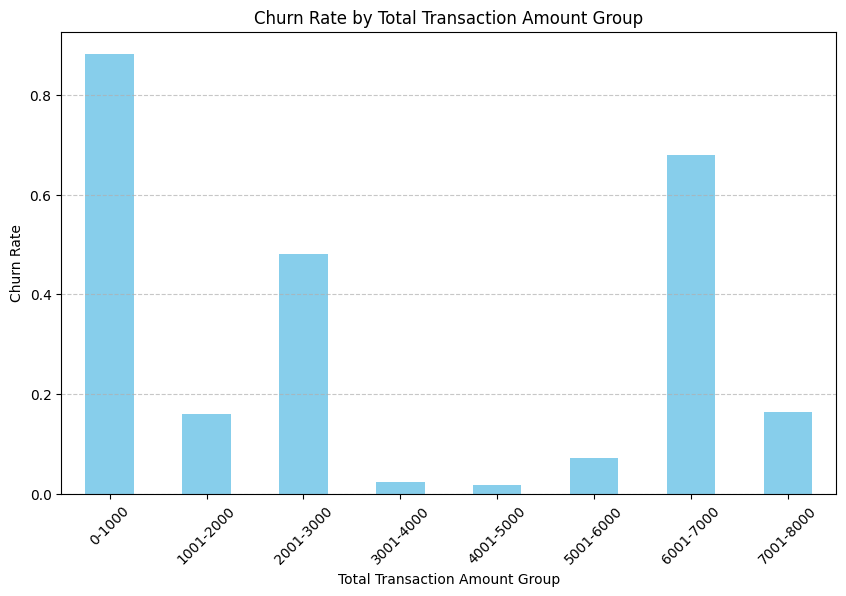

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the customer data
# Group customers by Total_Trans_Amt category
data['Total_Trans_Amt_Group'] = pd.cut(data['Total_Trans_Amt'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000], labels=['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000', '7001-8000'])

# Calculate churn rate by Total_Trans_Amt group
churn_rate_by_total_trans_amt = data.groupby('Total_Trans_Amt_Group')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())

# Plot churn rate by Total_Trans_Amt group
plt.figure(figsize=(10, 6))
churn_rate_by_total_trans_amt.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Total Transaction Amount Group')
plt.xlabel('Total Transaction Amount Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [46]:
print(data['Total_Relationship_Count'])

0        5
1        6
2        4
3        3
4        5
        ..
10122    3
10123    4
10124    5
10125    4
10126    6
Name: Total_Relationship_Count, Length: 10127, dtype: int64


C:\Users\afshi\AppData\Local\Temp\ipykernel_16372\2591562097.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_total_relationship_count = data.groupby('Total_Relationship_Count_Group')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())


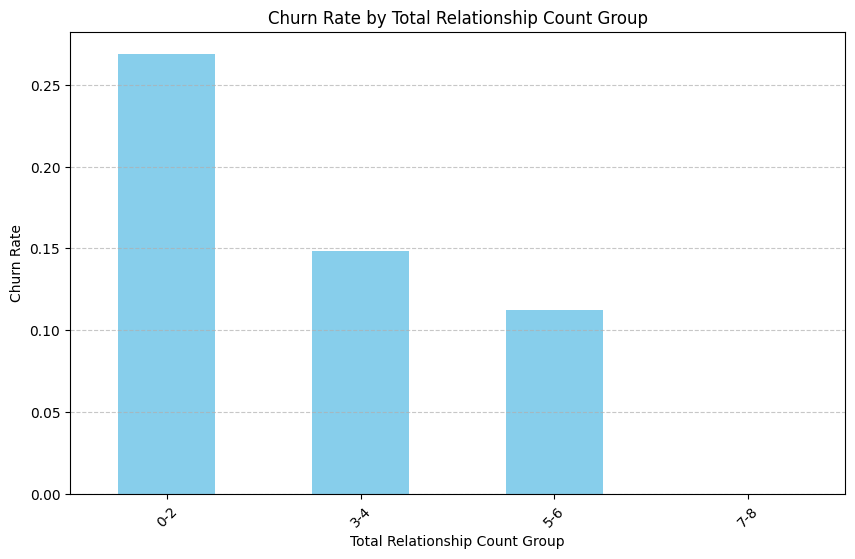

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the customer data
# Group customers by Total_Relationship_Count category
data['Total_Relationship_Count_Group'] = pd.cut(data['Total_Relationship_Count'], bins=[0, 2, 4, 6, 8], labels=['0-2', '3-4', '5-6', '7-8'])

# Calculate churn rate by Total_Relationship_Count group
churn_rate_by_total_relationship_count = data.groupby('Total_Relationship_Count_Group')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())

# Plot churn rate by Total_Relationship_Count group
plt.figure(figsize=(10, 6))
churn_rate_by_total_relationship_count.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Total Relationship Count Group')
plt.xlabel('Total Relationship Count Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\afshi\AppData\Local\Temp\ipykernel_16372\3255209880.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_avg_open_to_buy = data.groupby('Avg_Open_To_Buy_Bins')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())


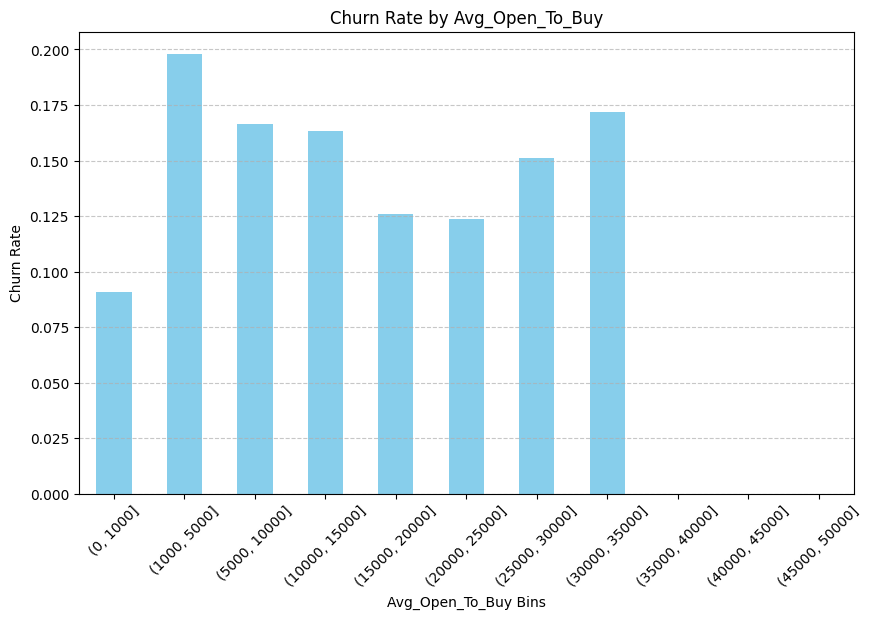

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the customer data
# Define the bins for Avg_Open_To_Buy
bins = [0, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

# Create bins for Avg_Open_To_Buy
data['Avg_Open_To_Buy_Bins'] = pd.cut(data['Avg_Open_To_Buy'], bins=bins)

# Calculate churn rate for each bin
churn_rate_by_avg_open_to_buy = data.groupby('Avg_Open_To_Buy_Bins')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())

# Plot churn rate by Avg_Open_To_Buy bins
plt.figure(figsize=(10, 6))
churn_rate_by_avg_open_to_buy.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Avg_Open_To_Buy')
plt.xlabel('Avg_Open_To_Buy Bins')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

